<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Principles of Data Visualization, Part 2

_Authors: Matt Brems, Noelle Brown_

<img src="./images/bad_viz.png" alt="drawing" width="500"/>

<details><summary>Let's break down the data visualization above. What should they do differently?</summary>
    
- The percentages make no sense to visualize since they don't add up to 100%
- In general, it's not a great idea to visualize percentages using a shape where is hard to calculate the volume. This is because the percentages/fractions will not align to the actual volume of the shape. Stick to rectangles to make this easily interpretable!
</details>

[Image Source](https://gizmodo.com/8-horrible-data-visualizations-that-make-no-sense-1228022038)

### Packages Today
- [NumPy](http://www.numpy.org/): Numerical Python - scalars, vectors, matrices, etc. and tools for manipulating them.
- [Pandas](https://pandas.pydata.org/): Python Data Analysis Library - storing/"munging" (cleaning/transforming) data.
- [Matplotlib](https://matplotlib.org/): Python plotting library - this is (unsurprisingly) what we'll use to plot things!
- [Bokeh](https://bokeh.pydata.org/en/latest/): Interactive Visualization Library - this is (also unsurprisingly) what we'll use to generate interactive visualizations!
- [Seaborn](https://seaborn.pydata.org/): Statistical Visualization Library - this is commonly used for more complicated visuals (we'll ignore most of these because they're often less accessible to stakeholders).

### LEARNING OBJECTIVES 
1. Identify what type of visualization may be appropriate for a given scenario.
2. Generate text, bar graphs, histograms, heatmaps, scatterplots, line plots in `matplotlib`.
3. Critique data visualizations and implement changes in `matplotlib`.

In [1]:
# Importing NumPy and Pandas.
import numpy as np
import pandas as pd

# Importing matplotlib.pyplot - the specific plotting API 
# https://matplotlib.org/api/pyplot_api.html
import matplotlib.pyplot as plt

# Import Seaborn.
import seaborn as sns

In [3]:
# Bring in stock data.
stock_df = pd.read_csv('./data/stocks_data.csv')

# Convert stock date to datetime.
stock_df['date'] = pd.to_datetime(stock_df['date'])

In [4]:
# Check out the first five rows of the stocks data.
stock_df.head()


,weekday,date,high,low,close,volume,ticker
0,Friday,1998-01-02,3.95098,3.28236,3.95098,24947201.10,AAPL
1,Monday,1998-01-05,4.02635,3.69325,3.89020,22344145.08,AAPL
2,Tuesday,1998-01-06,4.98432,3.58628,4.60502,63150252.55,AAPL
3,Wednesday,1998-01-07,4.68040,4.20871,4.24032,36978255.52,AAPL
4,Thursday,1998-01-08,4.52965,4.11875,4.39107,27687622.95,AAPL


---

#### Commonly, we want to visualize *relationships*.
- The **relationship** between two variables allows us to understand if and how one variable changes when another changes.

![](./images/scatter.jpeg)

- This is a visual representation of all of our data. We can use this to answer lots of other questions.
    - Does there appear to be any association between ice cream and murders?
    - As ice cream consumption increases, how does the number of murders change?
    - **Note: We cannot say anything about causality here!**

### If your goal is to visualize the relationship between two variables, then:
- if you are comparing two qualitative variables, **use a table or a heatmap**.
- if you are comparing time and another quantitative variable, **use a lineplot**.
- if you are comparing two (non-time) quantitative variables, **use a scatterplot**.
- if you are comparing a qualitative variable and a quantitative variable, **use stacked histograms**.

**Example 1**: Suppose we wanted to examine the relationships between our variables.

A commonly seen implementation of a heatmap uses the [Seaborn library](https://seaborn.pydata.org).

In [5]:
stock_df.head()

,weekday,date,high,low,close,volume,ticker
0,Friday,1998-01-02,3.95098,3.28236,3.95098,24947201.10,AAPL
1,Monday,1998-01-05,4.02635,3.69325,3.89020,22344145.08,AAPL
2,Tuesday,1998-01-06,4.98432,3.58628,4.60502,63150252.55,AAPL
3,Wednesday,1998-01-07,4.68040,4.20871,4.24032,36978255.52,AAPL
4,Thursday,1998-01-08,4.52965,4.11875,4.39107,27687622.95,AAPL


/tmp/ipykernel_4009/2499642508.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = stock_df.corr()


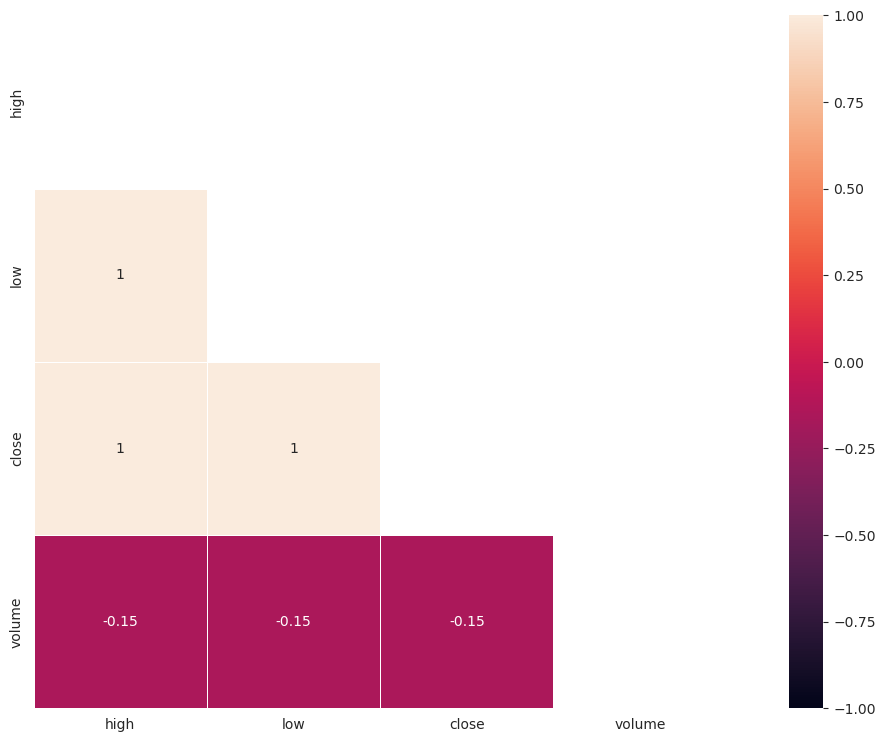

In [6]:
# This code is taken with minor modifications from https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Establish size of figure.
plt.figure(figsize = (16,9))

# Get correlation of variables.
corr = stock_df.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)

**Example 2**: Suppose we wanted to examine how stock volume changes over time for GOOG.

In [7]:
# Get date column for Google stocks
goog_dates = stock_df[stock_df['ticker'] == 'GOOG']['date']

In [8]:
# Get volume column for Google stocks
goog_vol = stock_df[stock_df['ticker'] == 'GOOG']['volume']

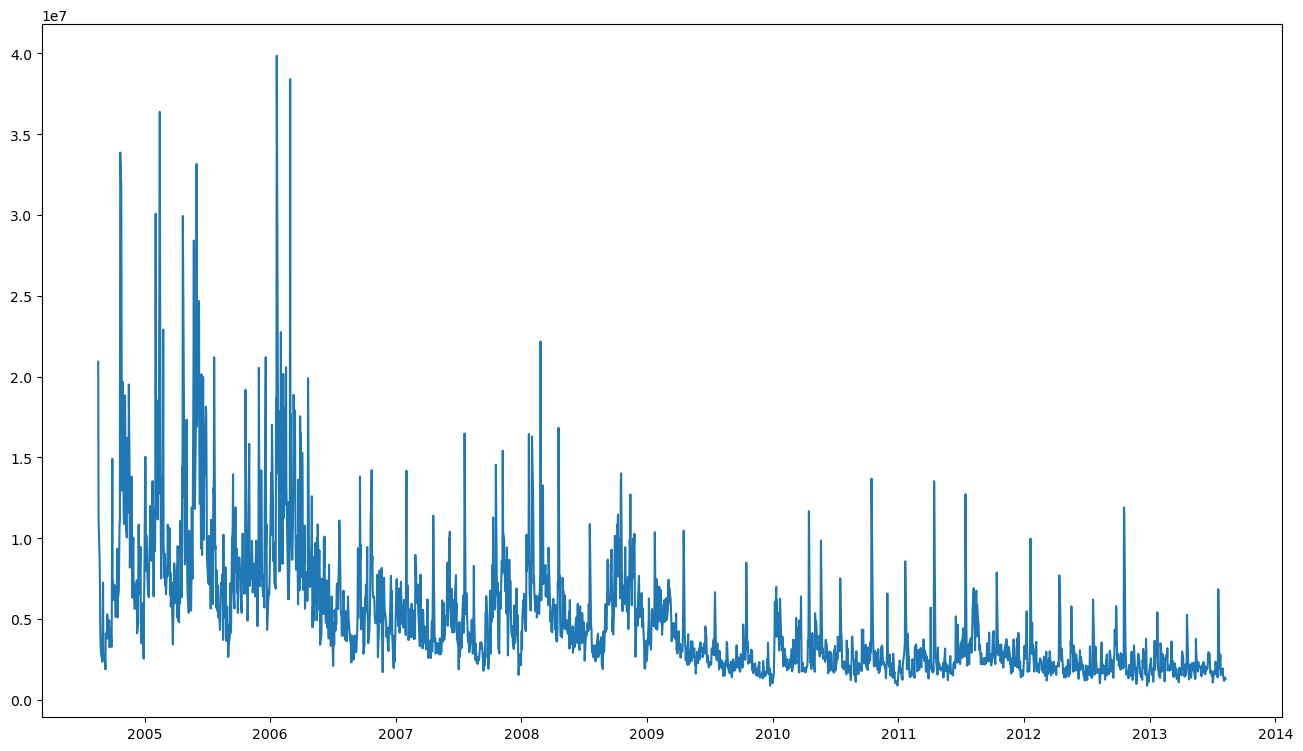

In [10]:
# Establish the size of the figure.
plt.figure(figsize = (16, 9))

# Create line plot of GOOG volume over time.
plt.plot(goog_dates, goog_vol, label = 'GOOG')

**Example 3**: Suppose we wanted to examine how stock volume changes over time for GOOG *and* for NKE.

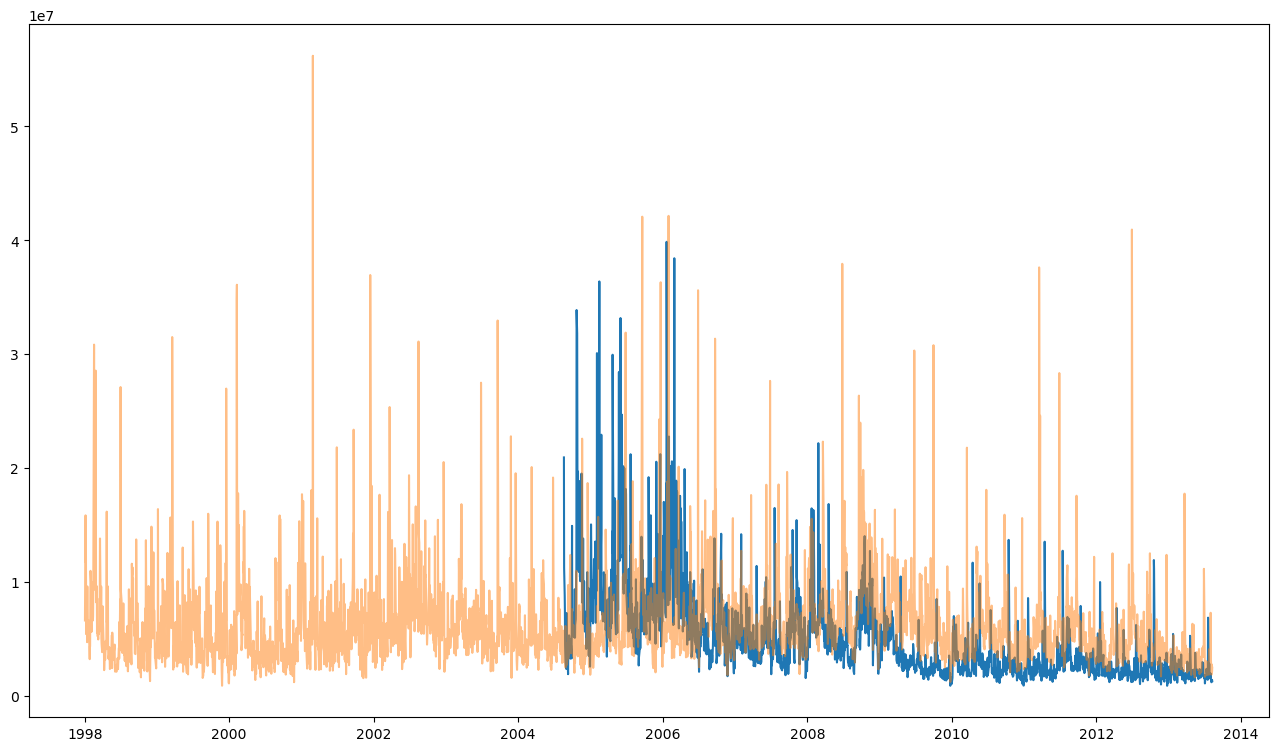

In [13]:
# Establish the size of the figure.
plt.figure(figsize = (16, 9))

# Create line plot of GOOG volume over time.
plt.plot(goog_dates, goog_vol, label = 'GOOG')

# Create line plot of NKE volume over time.
plt.plot(
    stock_df[stock_df['ticker'] == 'NKE']['date'], # NKE dates
    stock_df[stock_df['ticker'] == 'NKE']['volume'], # NKE volume
    label = 'NKE',
    alpha = 0.5
    )
plt.show()

**Example 4**: Suppose we wanted to examine how the stock volume changed from the first day of trading in 2012 to the first day of trading in 2013 for all stock tickers.
- A **slopegraph** is what Cole Nussbaumer Knaflic refers to as a line graph with two points on the x-axis.

In [14]:
stock_df[(stock_df['ticker'] == 'GOOG') & (stock_df['date'] > '2012-01-01')]['date'].min()

Timestamp('2012-01-03 00:00:00')

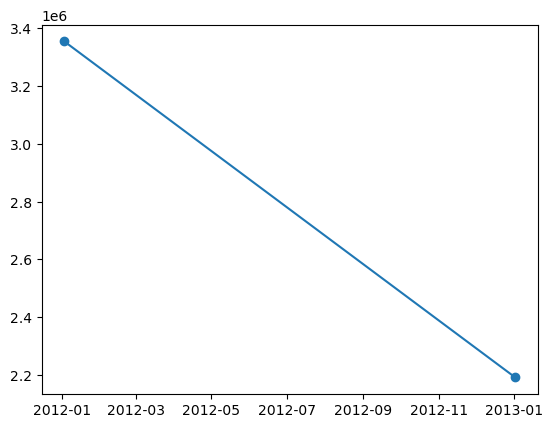

In [17]:
# plot the change over time from 2012 to 2013 for Google volume
plt.plot(stock_df[(stock_df['ticker'] == 'GOOG') & ((stock_df['date'] == '2012-01-03') | (stock_df['date'] == '2013-01-02'))]['date'],
         stock_df[(stock_df['ticker'] == 'GOOG') & ((stock_df['date'] == '2012-01-03') | (stock_df['date'] == '2013-01-02'))]['volume'],
         label = 'GOOG', marker = 'o')

In [20]:
all_stock = list(stock_df['ticker'].unique())
all_stock

['AAPL', 'DOW', 'GOOG', 'INTC', 'NDAQ', 'NKE', 'SBUX', 'YHOO']

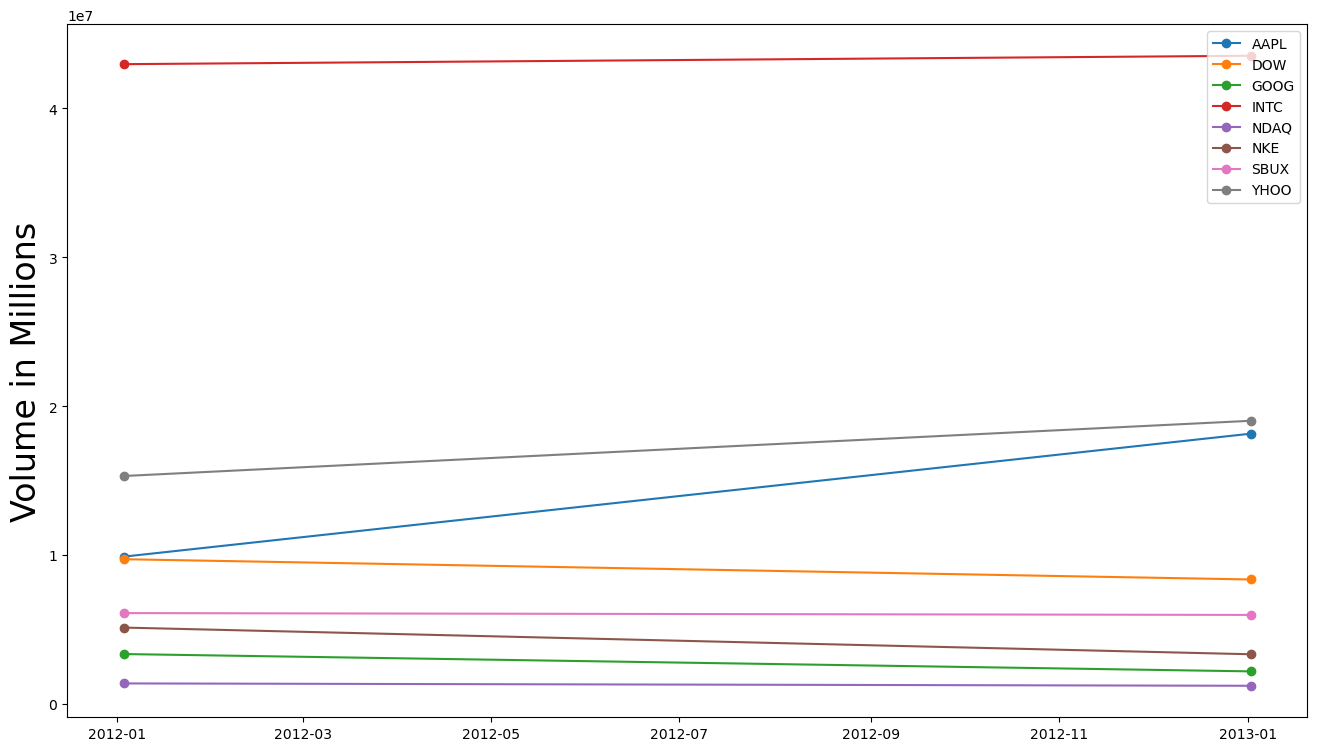

In [21]:
# Establish the size of the figure.
plt.figure(figsize = (16, 9))

# Create line plot of all stock volumes over 2012.
for ticker in all_stock:
    plt.plot(stock_df[(stock_df['ticker'] == ticker) & ((stock_df['date'] == '2012-01-03') | (stock_df['date'] == '2013-01-02'))]['date'],
         stock_df[(stock_df['ticker'] == ticker) & ((stock_df['date'] == '2012-01-03') | (stock_df['date'] == '2013-01-02'))]['volume'],
         label = ticker, marker = 'o')

    
plt.legend(loc = 'upper right')
plt.ylabel("Volume in Millions", fontsize = 24);

**Example 5**: Suppose we wanted to visualize how strongly correlated high daily prices and daily trading volumes are.

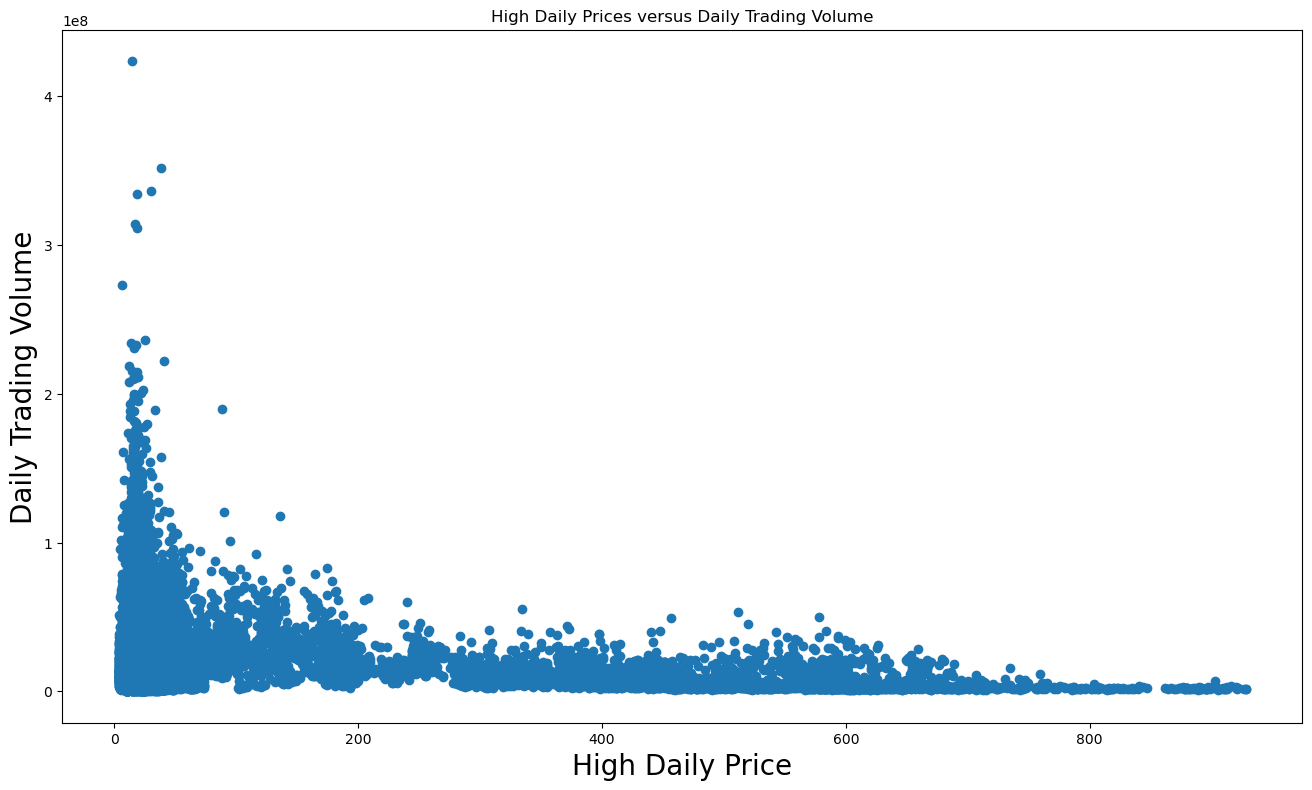

In [23]:
# Establish the size of the figure.
plt.figure(figsize = (16, 9))

# Create scatterplot of high prices versus volume.
plt.scatter(stock_df['high'], stock_df['volume'])

plt.title("High Daily Prices versus Daily Trading Volume")
plt.ylabel("Daily Trading Volume", fontsize = 20)
plt.xlabel("High Daily Price", fontsize = 20);

**Example 6**: Suppose you want to visualize the distribution of low prices for `GOOG`, `SBUX`, and `AAPL`.

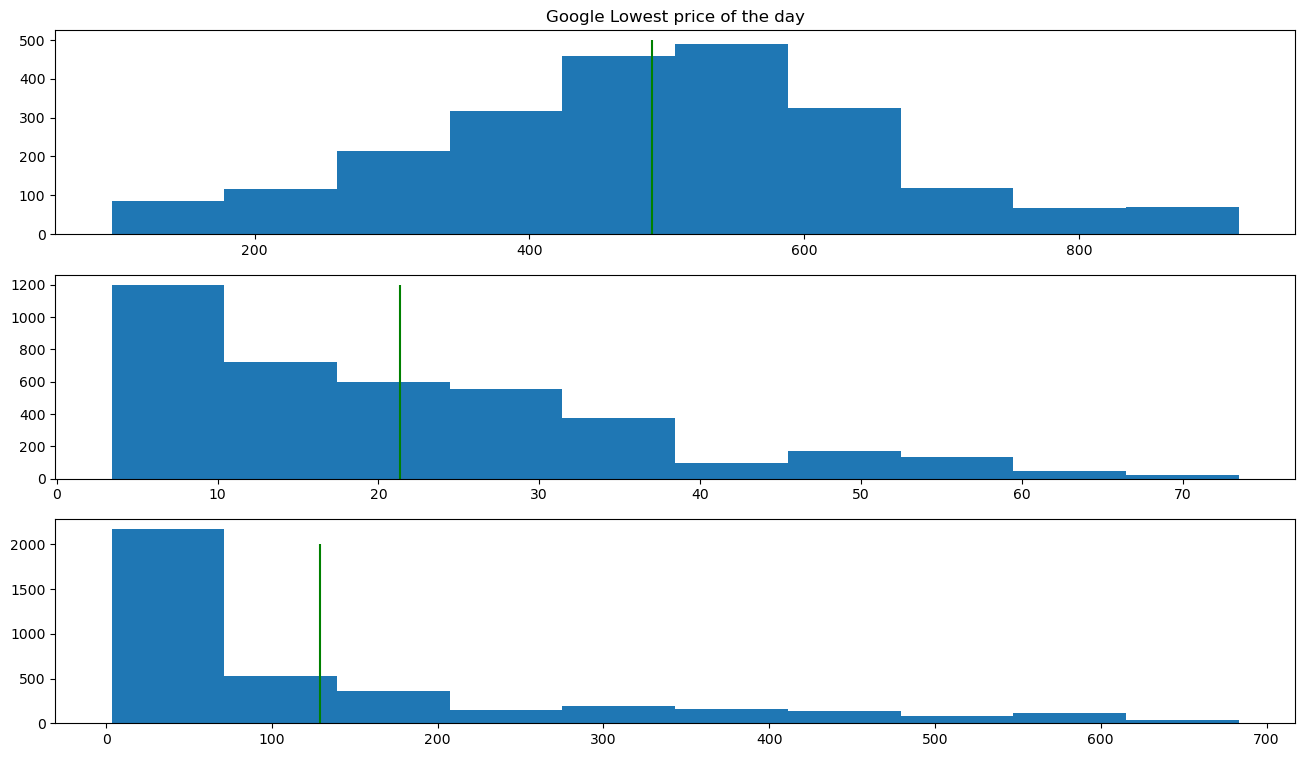

In [30]:
# Establish figure size.
plt.figure(figsize = (16,9))

# We can create subplots, which allows us to have multiple subplots in the same plot.
# plt.subplot(3, 1, 1) means we have 3 rows, 1 column, and are referencing plot 1.
ax1 = plt.subplot(3,1,1)
ax1.set_title('Google Lowest price of the day')
ax1.hist(stock_df[stock_df['ticker']=='GOOG']['low'])
ax1.vlines(x = np.mean(stock_df[stock_df['ticker']=='GOOG']['low']), ymin= 0, ymax = 500, color = 'green')

# plt.subplot(3, 1, 2) means we have 3 rows, 1 column, and are referencing plot 2.
ax2 = plt.subplot(3,1,2)
ax2.hist(stock_df[stock_df['ticker']=='SBUX']['low'])
ax2.vlines(x = np.mean(stock_df[stock_df['ticker']=='SBUX']['low']), ymin= 0, ymax = 1200, color = 'green')
# plt.subplot(3, 1, 3) means we have 3 rows, 1 column, and are referencing plot 3.
ax3 = plt.subplot(3,1,3)
ax3.hist(stock_df[stock_df['ticker']=='AAPL']['low'])
ax3.vlines(x = np.mean(stock_df[stock_df['ticker']=='AAPL']['low']), ymin= 0, ymax = 2000, color = 'green')

**Example 7**: Suppose you want to visualize the distribution of low prices for `GOOG`, `SBUX`, and `AAPL` but want to explicitly show the differences in means between the groups.

In [ ]:
# Establish figure size.
plt.figure(figsize = (16,9))



Some people will use stacked bar charts to visualize the distribution of variables broken out into categories. I generally prefer to not do this.
- ***My "best practice" recommendation***: Stay away from stacked bar charts; there are usually better ways to communicate what you want to communicate.

![](./images/stacked-bar-chart.png)

### If-This-Then-That Rules
- If I am stating one or two numbers, then:
    - **simply report the numbers**.
    - compare numbers using a **bar chart**.
- If I am visualizing the distribution of one variable, then:
    - If that variable is qualitative: **use a bar chart**.
    - If that variable is quantitative: **use a histogram**.
- If I am visualizing the relationship between two variables, then:
    - If both variables are qualitative, then: 
        - If there are at most three categories for both variable, then **use a table**.
        - If there are more than three categories in either variable, then **use a heatmap**.
    - If both variables are quantitative, then:
        - If one variable is time, then **use a line plot**.
        - Otherwise, **use a scatterplot**.
    - If one variable is quantitative and another is qualitative then:
        - **Use a bunch of histograms**.
        - Stacked bar charts, if you choose to do so.

## Interview Question


<details><summary>You are analyzing attrition (employees leaving a company). You have a dataset of all employees, with specific features on their role (department, position, salary, etc.) and whether or not they left the company. Your analysis should indicate how many individuals left the organization and identify any trends associated with attrition (ex. concentration, etc.) What visualizations would you build to communicate your findings to the client? (Answers can - and should - vary!)
</summary>
    
- Since "left company" is a categorical variable, we could generate a heatmap comparing these values with other categorical variables like department, position, etc.
- We could generate stacked histograms comparing "left company" for quantitative variables. For example, visualize salary for those who stayed versus those who left.
</details>

# Intermediate: Improving the basic visualization.

If you're familiar with before/after images, they're a convenient way for us to see how drastically things have changed.

<img src="./images/santorini_before.jpg" alt="drawing" width="750"/>

<img src="./images/santorini_after.jpg" alt="drawing" width="750"/>

- Images pulled from [this site](https://photographyconcentrate.com/15-snazzy-lightroom-and-afters/); recommendation by Shannon Bingham, DSI-US-6.

What we've done so far is to create the "before" image. We've identified a ***good*** tool for the job. Now let's make it a ***great*** tool.

Before getting into a specific list of things to consider, let's head to this blog post about "[Unmaking Graphs](https://towardsdatascience.com/unmaking-graphs-f584625c5bfd)."

**Example 8**: Suppose we wanted to visualize two stock prices over time. It would be helpful to be able to compare these stock prices to one another as well.

<details><summary>What type of chart would we likely want to create?</summary>

- If we are visualizing the relationship between two variables:
    - If both variables are quantitative:
        - If one quantitative variable is time:
            - If we are visualizing over more than two time points:
                - Let's do a line graph!
</details>

In [33]:
import matplotlib.dates as dates
import datetime

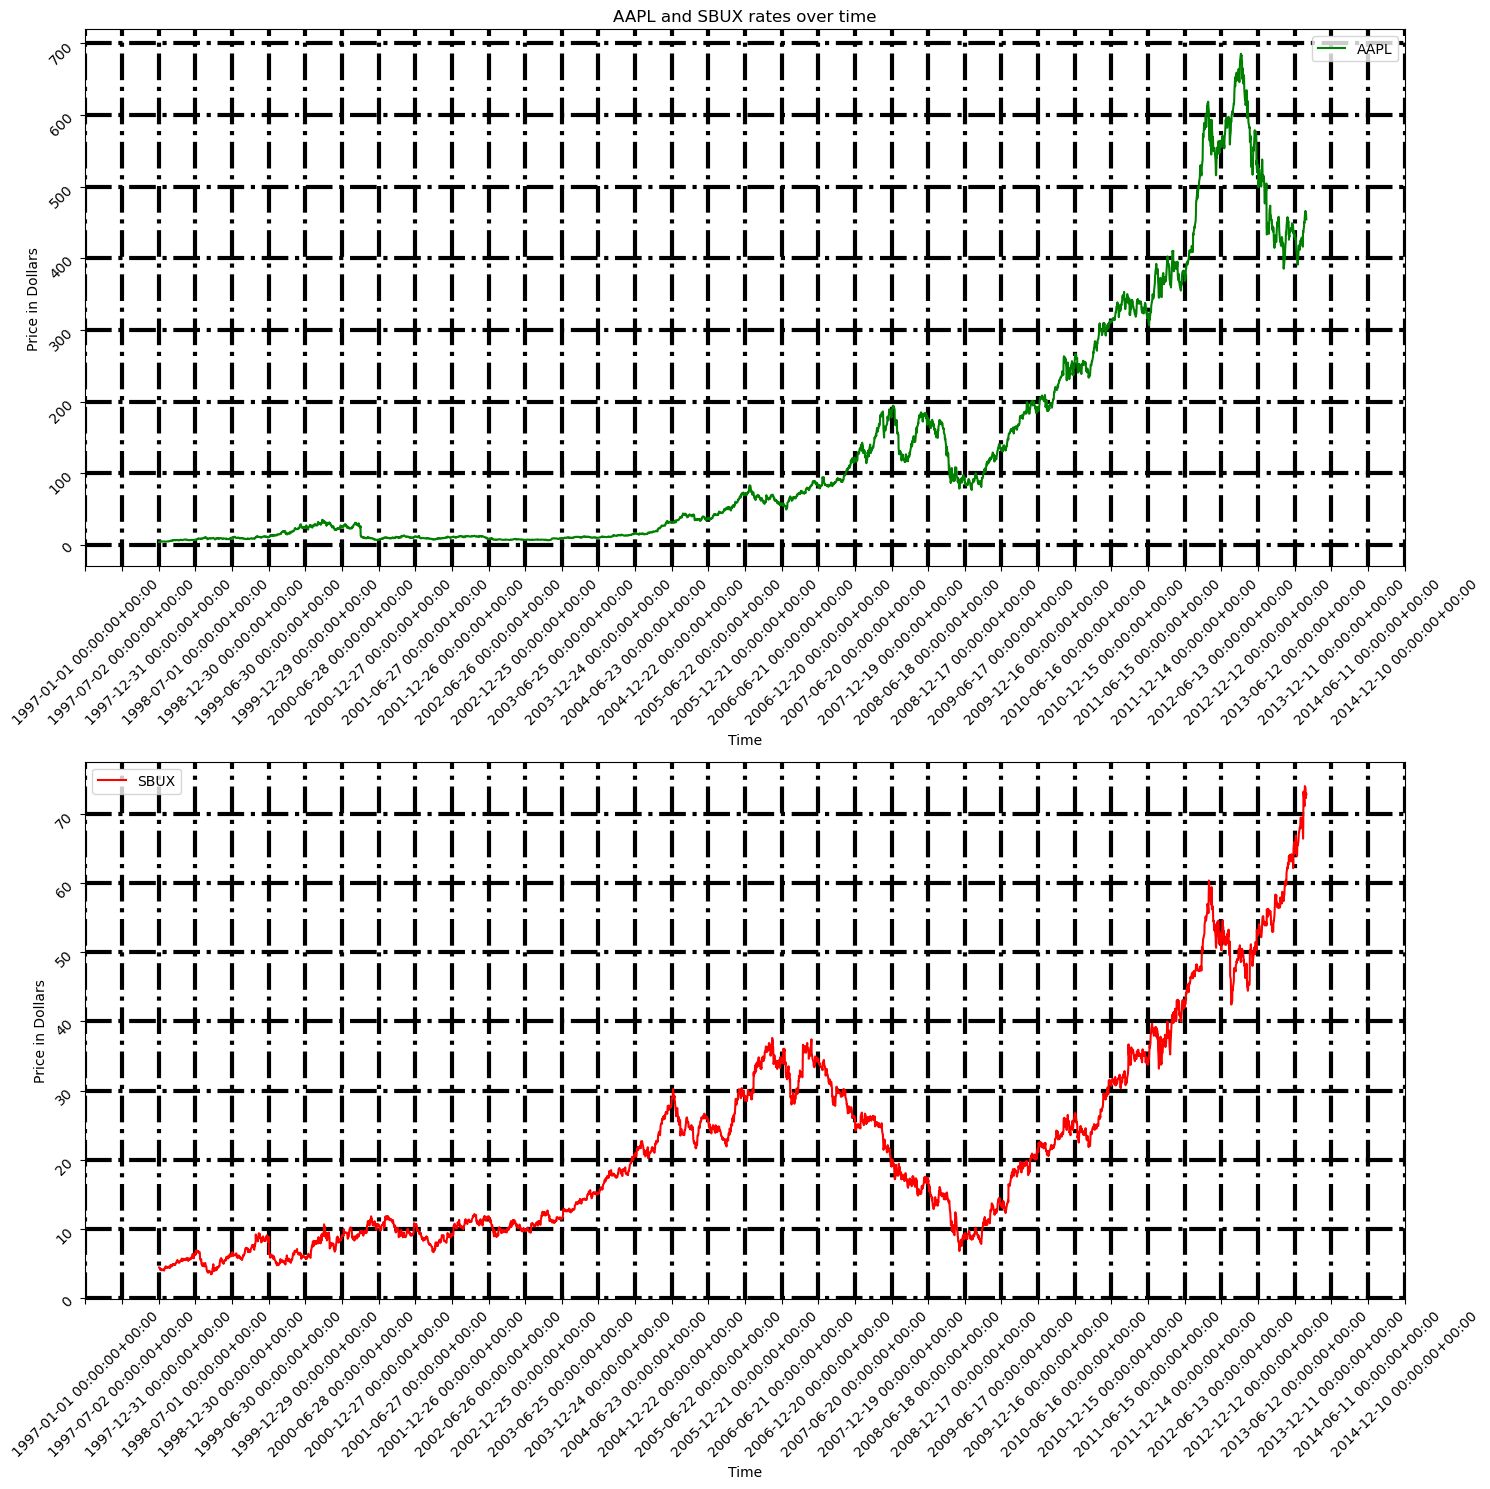

In [34]:
# Establish the size of the figure.
plt.figure(figsize = (15, 15))

# Create two plots. (2 rows, 1 column, referring to 1st plot)
plt.subplot(2, 1, 1)

# Create line plot of AAPL closing price over time.
plt.plot(stock_df[stock_df['ticker'] == 'AAPL']['date'],
         stock_df[stock_df['ticker'] == 'AAPL']['close'],
         c = 'green',
         label = 'AAPL')

# Create the legend and set it in the upper-right hand corner.
plt.legend(loc = 'upper right')

# Create a grid in the background.
plt.grid(True, linewidth = 3, linestyle = '-.', c = 'black')

# Create tick mark labels on the X axis and rotate them.
plt.xticks(dates.drange(dstart = datetime.datetime(1997, 1, 1),
                        dend = datetime.datetime(2014, 12, 31),
                        delta = datetime.timedelta(weeks=26)),
           dates.num2date(dates.drange(dstart = datetime.datetime(1997, 1, 1),
                        dend = datetime.datetime(2014, 12, 31),
                        delta = datetime.timedelta(weeks = 26))), rotation = 45)

# Create tick mark labels on the Y axis and rotate them.
plt.yticks(rotation = 45)

plt.ylabel("Price in Dollars")
plt.xlabel("Time")
plt.title("AAPL and SBUX rates over time")

# Create two plots. (2 rows, 1 column, referring to 2nd plot)
plt.subplot(2, 1, 2)

# Create line plot of SBUX closing price over time.
plt.plot(stock_df[stock_df['ticker'] == 'SBUX']['date'],
         stock_df[stock_df['ticker'] == 'SBUX']['close'],
         c = 'red',
         label = 'SBUX')

# Create the legend and set it in the upper-left hand corner.
plt.legend(loc = 'upper left')

# Create a grid in the background.
plt.grid(True, linewidth = 3, linestyle = '-.', c = 'black')

# Create tick mark labels on the X axis and rotate them.
plt.xticks(dates.drange(dstart = datetime.datetime(1997, 1, 1),
                        dend = datetime.datetime(2014, 12, 31),
                        delta = datetime.timedelta(weeks=26)),
           dates.num2date(dates.drange(dstart = datetime.datetime(1997, 1, 1),
                        dend = datetime.datetime(2014, 12, 31),
                        delta = datetime.timedelta(weeks=26))), rotation = 45)

# Create tick mark labels on the Y axis and rotate them.
plt.yticks(rotation = 45)

# Create X axis label.
plt.xlabel("Time")

# Create Y axis label.
plt.ylabel("Price in Dollars")

# Great line when working with multiple subplots; makes sure they're fitted well.
plt.tight_layout();

<details><summary>Let's critique this. What do you like about these plots? What do you dislike?</summary>

- The y-axes are different, so it's hard to directly compare the two together. This could be done more efficiently in one plot.
- Red and green together is a bad idea due to colorblindness (a pretty prevalent condition). Let's pick better colors! Blue and orange are good choices for two contrasting colors.
- The grid is really "loud" and pulls attention from the series we want to study. Can we make it subtler in color and pattern or get rid of it completely?
- The x-axis has way too much information. At minimum, we can get rid of the 00:00:00+00:00 because this isn't providing any additional information. However, we can probably get rid of the days/months and make the tick marks less frequent. (We know how years are ordered, so we could just have 1998, 2003, 2008, and 2013 if we wanted!)
- Rotating the tick labels makes it tough for us to read the labels. Let's un-rotate them.
- We probably don't need the x-axis label. If we see the values 1998, 2003, 2008, and 2013, we can reasonably assume that this means years or time. Since the label isn't giving us any additional information, let's get rid of it!
- The title is hard to view. Let's make it larger.
- We can increase the size of our legend.
- This is a non-exhaustive list!
</details>

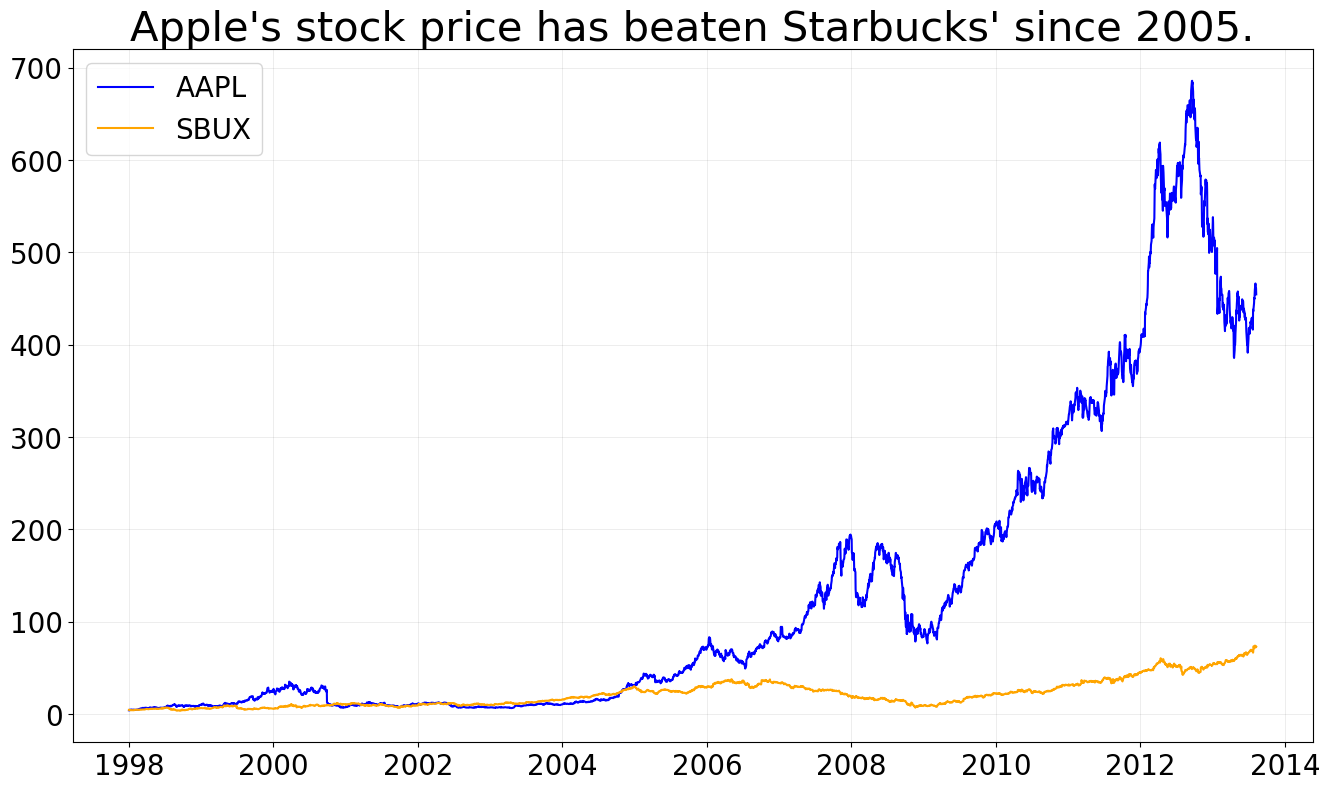

In [35]:
# Establish the size of the figure.
plt.figure(figsize = (16, 9))

# Create line plot of AAPL closing price over time.
plt.plot(stock_df[stock_df['ticker'] == 'AAPL']['date'],
         stock_df[stock_df['ticker'] == 'AAPL']['close'],
         c = 'blue',
         label = 'AAPL')

# Create line plot of SBUX closing price over time.
plt.plot(stock_df[stock_df['ticker'] == 'SBUX']['date'],
         stock_df[stock_df['ticker'] == 'SBUX']['close'],
         c = 'orange',
         label = 'SBUX')

# Create the legend and set it in the upper-left hand corner.
plt.legend(loc = 'upper left', fontsize = 20)

# Create a grid in the background.
plt.grid(True, linewidth = 0.5, linestyle = '-', c = 'black', alpha = 0.1)

# Create tick mark labels on the Y axis and rotate them.
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Create title.
plt.title("Apple's stock price has beaten Starbucks' since 2005.", fontsize = 30);

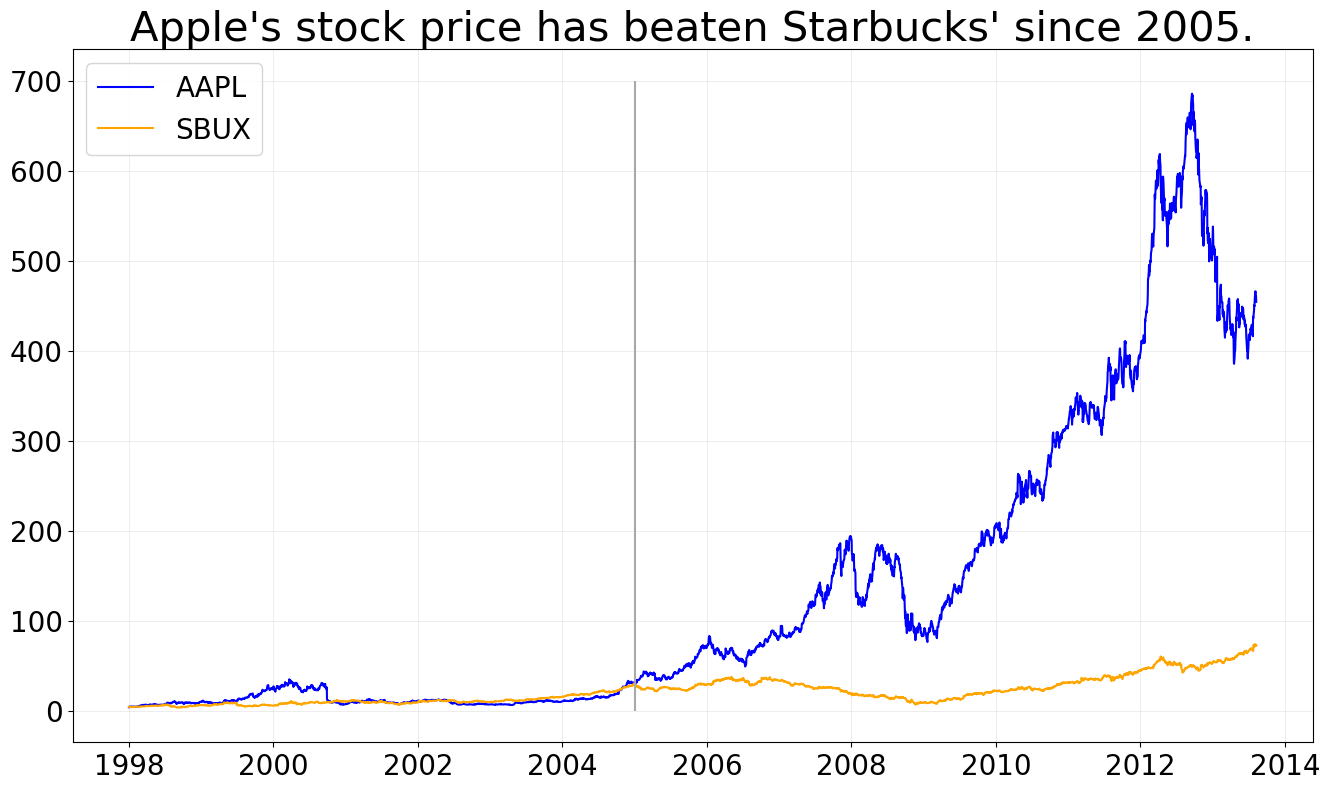

In [36]:
# Establish the size of the figure.
plt.figure(figsize = (16, 9))

# Create line plot of AAPL closing price over time.
plt.plot(stock_df[stock_df['ticker'] == 'AAPL']['date'],
         stock_df[stock_df['ticker'] == 'AAPL']['close'],
         c = 'blue',
         label = 'AAPL')

# Create line plot of SBUX closing price over time.
plt.plot(stock_df[stock_df['ticker'] == 'SBUX']['date'],
         stock_df[stock_df['ticker'] == 'SBUX']['close'],
         c = 'orange',
         label = 'SBUX')

# Create the legend and set it in the upper-left hand corner.
plt.legend(loc = 'upper left', fontsize = 20)

# Create a grid in the background.
plt.grid(True, linewidth = 0.5, linestyle = '-', c = 'black', alpha = 0.1)

# Create tick mark labels on the Y axis and rotate them.
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Create title.
plt.title("Apple's stock price has beaten Starbucks' since 2005.", fontsize = 30)

# Add vertical line (vlines) to specifically identify the point of interest.
plt.vlines(x = datetime.datetime(2005, 1, 1), ymin = 0, ymax = 700, color = 'darkgrey');

If you want to be more creative, [here](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) are all the colors you can use in matplotlib!

## When de-cluttering, here is an incomplete list of things to consider doing:
### Chart Types
##### Take away pie charts. (Use a bar chart instead!)
    
![](./images/pie_chart.png)
    
##### Take away 3D charts (especially pie charts)!
    
![](./images/3d_pie_chart.jpg)
![](./images/3d_column_chart.jpg)

##### Take away secondary y-axes.
    
![](./images/secondary_y_axis.png)

### Use color effectively.
    - Avoid red/green.
    - Use a gradient.
    
![](./images/color-bar-chart.png)

    - Remove background color.
    - Color should emphasize.
    - There are ways to emphasize other than color! (Size, a label, proximity, etc.) If you are concerned that your image is too "cluttered," then consider toning down your use of color.
    
### Axes
    - Don't rotate labels.
    - Consider rotating your chart if your axis labels are too large.
    - Move borders to light grey.
    - Remove grid.
    
### Other
    - Place legend properly (if needed).
    - If lots of small categories/extreme values, consider collapsing/truncating them.
    - Order categories in sensical order. If a logical/sensical order does not exist, then from largest value to smallest value.

---
## Crafting the experience:
    - Use smart chart title.    
    - Align along vertical axis.
    - Use bold to emphasize text. (But don't bold everything! Recommendations include to bold at most 10% of your text.)
    - If there is a lot going on, then walk people through it slowly.

<img src="./images/investment_1.png" width="500">

<img src="./images/investment_2.png" width="500">

# Bonus: Adding interactivity to visualizations with `bokeh`.

The [Bokeh](https://bokeh.pydata.org/en/latest/) library is a wonderful library that enables us to create interactive visualizations. The library is built in Python, but is built on top of Javascript.
- This means that we get to work in Python, but our Python code will get the benefits of what Javascript can do!

If you want to generate your own interactive visuals, I encourage you to check out the [Bokeh gallery](https://bokeh.pydata.org/en/latest/docs/gallery.html), then edit from there.

In [ ]:
# you may need to pip install bokeh in your terminal
# or run:
# !pip install bokeh

In [45]:
# This example is pulled directly from https://bokeh.pydata.org/en/latest/docs/gallery/range_tool.html
# with minor edits being made, mostly to add comments.

from bokeh.io import show, output_notebook
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.plotting import figure

#from bokeh.sampledata.stocks import AAPL

# Put AAPL stock into a NumPy array.
dates = np.array(stock_df[stock_df['ticker'] == 'AAPL']['date'], dtype=np.datetime64)

# Specify the data.
source = ColumnDataSource(data = dict(date = dates, close = stock_df[stock_df['ticker'] == 'AAPL']['close']))

# Generate the top plot.
p = figure(height = 300,          # What is the height of the top plot? 
           width = 800,           # What is the width of the top plot? 
           tools = "xpan",             # No tools.
           toolbar_location = None,    # No toolbar.
           x_axis_type = "datetime",   # X-axis has a specific type: datetime. Ensures dates appear properly.
           x_axis_location = "above",  # Y-axis needs no specific formatting/typing.
           background_fill_color = "#efefef",     # Specify background color.
           x_range = (dates[1500], dates[2500]))  # Specify starting x-range for top plot. (1,500th through 2,500th value.)

# Specify the line being generated (similar to plt.plot()).
p.line('date', 'close', source = source)

# Setting label on the y-axis (vertical axis).
p.yaxis.axis_label = 'Price'

# Generate the bottom plot.
select = figure(title = "Drag the middle and edges of the selection box to change the range above", # Title of the plot.
                height = 130,     # What is the height of the bottom plot? 
                width = 800,      # What is the width of the bottom plot? 
                y_range = p.y_range,   # Make sure that the y-axes have the same height for both top and bottom plots.
                x_axis_type = "datetime",          # X-axis has a specific type: datetime. Ensures dates appear properly.
                y_axis_type = None,                # Y-axis needs no specific formatting/typing.
                tools = "",                        # No tools. (For now; one will be added later.)
                toolbar_location = None,           # No toolbar.
                background_fill_color = "#efefef") # Specify background color.

# Set up the "range tool" in the bottom plot.
range_rool = RangeTool(x_range = p.x_range) # Make sure the x-axes have the same width for the top and bottom plots.
range_rool.overlay.fill_color = "navy"    # Color the "range tool" box navy.
range_rool.overlay.fill_alpha = 0.2       # Make the "range tool" box 80% transparent.

# Specify the line being generated (similar to plt.plot()).
select.line('date', 'close', source = source)

# No grid.
select.ygrid.grid_line_color = None

# Add the range_rool tool to the select plot.
select.add_tools(range_rool)
select.toolbar.active_multi = range_rool

# Make our results show up in our Jupyter notebook.
output_notebook()

# If you want the results to show up in a .html file,
# run "from bokeh.io import output_file"
# then run "output_file('./filename.html')"

# Display these in a column with our plot (p) above the select tool in one column.
show(column(p, select))

Loading BokehJS ...

<details><summary>What is a situation in which this visual would work well?</summary>
- When you're measuring something over a long period of time and want to be able to view the whole thing and also more granularly see individual shifts.
</details>

Interactivity is something that you will generally consider using in the following cases:
1. When you want to visualize more than 3-4 variables at the same time.
    - Example [here](https://gapminder.org/tools/#$chart-type=bubbles).
2. When you want your visual to show macro (large) trends but also allow your user to get additional detail on the micro level if desired.
    - Example [here](http://www.nytimes.com/interactive/2012/10/15/us/politics/swing-history.html?_r=2&).